# Learning Scikit-learn: Machine Learning in Python

## Estimating Boston house pricing using Linear Regression- More Advanced Techniques

In [84]:
%matplotlib inline

We want to solve a *regression* problem (we want to approximate a real function)

In [64]:
import numpy as np
import matplotlib.pyplot as plt

Import the Boston House Pricing Dataset

In [65]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.feature_names)
print(np.max(boston.target), np.min(boston.target), np.mean(boston.target))
print(boston.DESCR)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
50.0 5.0 22.5328063241
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial hi

In [66]:
print(boston.data[0])
print(np.max(boston.data), np.min(boston.data), np.mean(boston.data))

[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
   5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
   1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
   4.98000000e+00]
711.0 0.0 70.0724468258


Separate train and test

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=33)

In [68]:
print(np.max(X_train), np.min(X_train), np.mean(X_train), np.max(y_train), np.min(y_train), np.mean(y_train))

711.0 0.0 69.6306540004 50.0 5.0 22.9237467018


Find the most important features

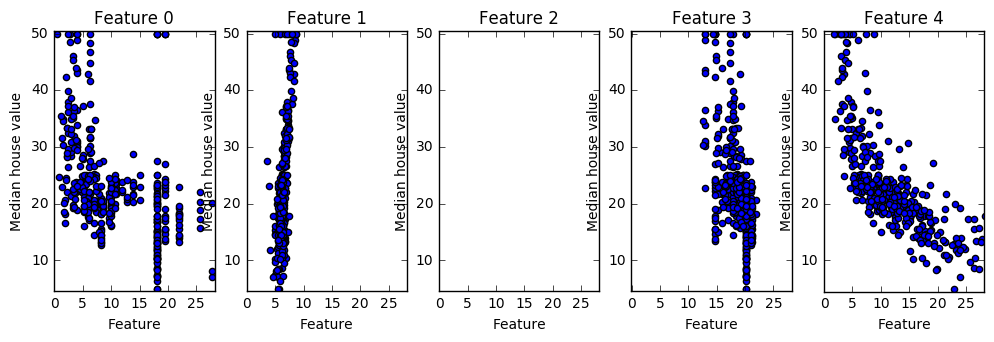

In [69]:
from sklearn.feature_selection import *
fs=SelectKBest(score_func=f_regression,k=5)
X_new=fs.fit_transform(X_train,y_train)
print(zip(fs.get_support(),boston.feature_names))

x_min, x_max = X_new[:,0].min() - .5, X_new[:, 0].max() + .5
y_min, y_max = y_train.min() - .5, y_train.max() + .5
#fig=plt.figure()
#fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Two subplots, unpack the axes array immediately
fig, axes = plt.subplots(1,5)
fig.set_size_inches(12,12)

for i in range(5):
    axes[i].set_aspect('equal')
    axes[i].set_title('Feature ' + str(i))
    axes[i].set_xlabel('Feature')
    axes[i].set_ylabel('Median house value')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    plt.scatter(X_new[:,i],y_train)


Normalize data

In [70]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
#scalerX = StandardScaler().fit(X_train)
#scalery = StandardScaler().fit(y_train)

#X_train = scalerX.transform(X_train)
#y_train = StandardScaler().fit_transform((y_train)
X_test = StandardScaler().fit_transform(X_test)
#y_test = StandardScaler().fit_transform(y_test)

print(np.max(X_train), np.min(X_train), np.mean(X_train), np.max(y_train), np.min(y_train), np.mean(y_train))


10.2028980046 -4.66702040845 2.47038706385e-15 50.0 5.0 22.9237467018


Start with a lineal model, SGDRegressor, that tries to find the hyperplane that minimizes a certain loss function (typically, the sum of squared distances from each instance to the hyperplane). It uses Stochastic Gradient Descent to find the minimum. 

In [71]:
from sklearn.cross_validation import *
def train_and_evaluate(clf, X_train, y_train):
    
    clf.fit(X_train, y_train)
    
    print("Coefficient of determination on training set:",clf.score(X_train, y_train))
    
    # create a k-fold croos validation iterator of k=5 folds
    cv = KFold(X_train.shape[0], 5, shuffle=True, random_state=33)
    scores = cross_val_score(clf, X_train, y_train, cv=cv)
    print("Average coefficient of determination using 5-fold crossvalidation:",np.mean(scores))

In [72]:
from sklearn import linear_model
clf_sgd = linear_model.SGDRegressor(loss='squared_loss', penalty=None,  random_state=42)
train_and_evaluate(clf_sgd,X_train,y_train)
print(clf_sgd.coef_)

Coefficient of determination on training set: 0.741378819424
Average coefficient of determination using 5-fold crossvalidation: 0.700233684596
[-0.77181583  0.63358347 -0.47244323  0.99696884 -0.68560736  3.55561393
 -0.18226548 -1.91355902  0.88153485 -0.634967   -1.85552066  0.5771618
 -3.58598923]


In [73]:
clf_sgd1 = linear_model.SGDRegressor(loss='squared_loss', penalty='l2',  random_state=42)
train_and_evaluate(clf_sgd1,X_train,y_train)

Coefficient of determination on training set: 0.741377754543
Average coefficient of determination using 5-fold crossvalidation: 0.700237362172


In [74]:
clf_sgd2 = linear_model.SGDRegressor(loss='squared_loss', penalty='l1',  random_state=42)
train_and_evaluate(clf_sgd2,X_train,y_train)

Coefficient of determination on training set: 0.741375598154
Average coefficient of determination using 5-fold crossvalidation: 0.70023271127


In [75]:
clf_sgd3 = linear_model.SGDRegressor(loss='squared_loss', penalty='elasticnet',  random_state=42)
train_and_evaluate(clf_sgd3,X_train,y_train)

Coefficient of determination on training set: 0.741377431363
Average coefficient of determination using 5-fold crossvalidation: 0.700236665079


Ridge regression

In [76]:
clf_ridge = linear_model.Ridge()
train_and_evaluate(clf_ridge,X_train,y_train)

Coefficient of determination on training set: 0.754904554125
Average coefficient of determination using 5-fold crossvalidation: 0.714014174328


SVR

In [77]:
from sklearn import svm
clf_svr= svm.SVR(kernel='linear')
train_and_evaluate(clf_svr,X_train,y_train)

Coefficient of determination on training set: 0.713473458903
Average coefficient of determination using 5-fold crossvalidation: 0.702875102932


In [78]:
clf_svr_poly= svm.SVR(kernel='poly')
train_and_evaluate(clf_svr_poly,X_train,y_train)

Coefficient of determination on training set: 0.712652372471
Average coefficient of determination using 5-fold crossvalidation: 0.631318587137


In [79]:
clf_svr_rbf= svm.SVR(kernel='rbf')
train_and_evaluate(clf_svr_rbf,X_train,y_train)

Coefficient of determination on training set: 0.685291922553
Average coefficient of determination using 5-fold crossvalidation: 0.642490218176


In [80]:
clf_svr_poly2= svm.SVR(kernel='poly',degree=2)
train_and_evaluate(clf_svr_poly2,X_train,y_train)

Coefficient of determination on training set: 0.524644743165
Average coefficient of determination using 5-fold crossvalidation: 0.454380526112


Finally, let's try again Random Forests, in their Extra Trees, and Regression version

In [81]:
from sklearn import ensemble
clf_et=ensemble.ExtraTreesRegressor(n_estimators=10,random_state=42)
train_and_evaluate(clf_et,X_train,y_train)

Coefficient of determination on training set: 1.0
Average coefficient of determination using 5-fold crossvalidation: 0.849774596328


In [82]:
print(clf_et.feature_importances_,boston.feature_names)

[ 0.03301369  0.00347885  0.03263771  0.01988468  0.02431437  0.3576085
  0.01784664  0.04237246  0.02351637  0.04614555  0.10424139  0.01641071
  0.27852908] ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Finally, evaluate our classifiers on the testing set

In [83]:
from sklearn import metrics
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True, show_r2_score=False):
    y_pred=clf.predict(X)   
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n")

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")
        
    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")
        
    if show_r2_score:
        print("Coefficient of determination:{0:.3f}".format(metrics.r2_score(y,y_pred)),"\n")

        
measure_performance(X_test,y_test,clf_et, show_accuracy=False, show_classification_report=False,show_confusion_matrix=False, show_r2_score=True)



Coefficient of determination:0.765 

